In [1]:
### Data Exploration

In [1]:
!pip install seaborn pandas nltk wordcloud -q

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/students/mjavaid/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Number of classes: 2
Class distribution:
label
0    222154
1    124823
Name: count, dtype: int64


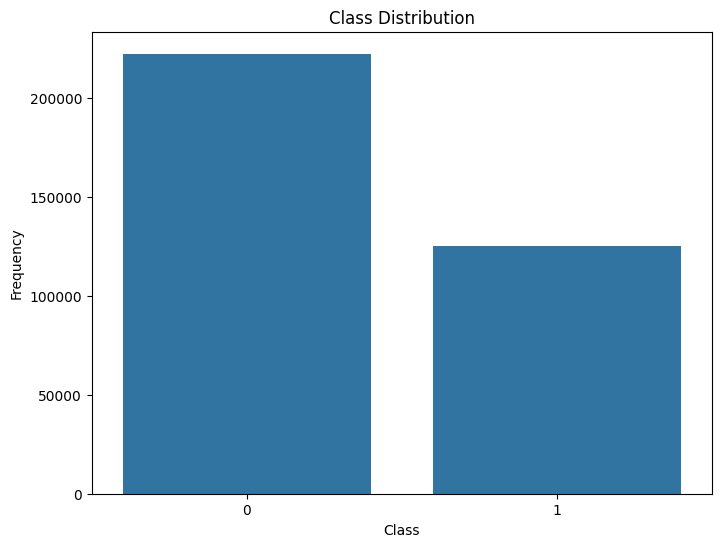

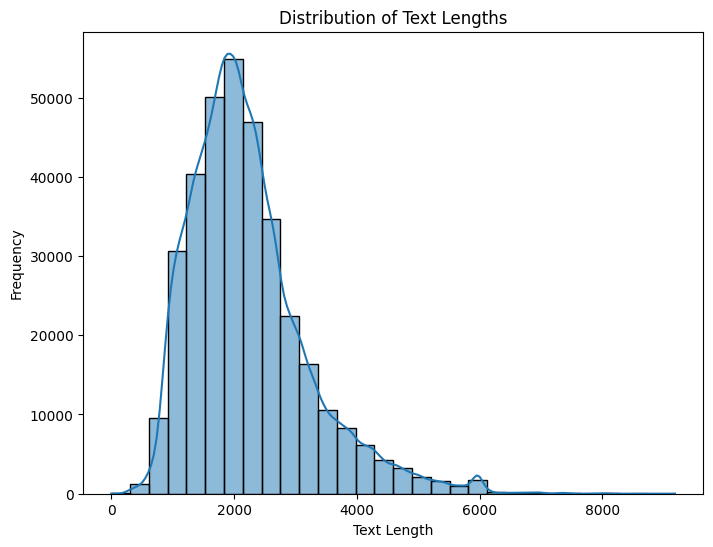

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from wordcloud import WordCloud

# Load the dataset (replace 'dataset.csv' with your file name)
df = pd.read_csv("final_train.csv")  # Adjust separator as needed

# Check the number of classes
num_classes = df['label'].nunique()
class_counts = df['label'].value_counts()

# Display basic information about classes
print(f"Number of classes: {num_classes}")
print("Class distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Analyze text lengths
df['text_length'] = df['text'].apply(len)
avg_text_length = df['text_length'].mean()

# Plot distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Determine the smaller class size for balancing
class_counts = df['label'].value_counts()
min_class_count = class_counts.min()
print(f"Smallest class count: {min_class_count}")

# Limit each class to 10% of its size (balanced)
subset_size_per_class = int(min_class_count * 0.1)
print(f"Subset size per class: {subset_size_per_class}")

# Create a balanced subset
balanced_subset = pd.concat([
    df[df['label'] == 0].sample(subset_size_per_class, random_state=42),
    df[df['label'] == 1].sample(subset_size_per_class, random_state=42)
])

# Shuffle the subset to mix classes
balanced_subset = balanced_subset.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the balanced subset into training (80%) and testing (20%)
train_df, test_df = train_test_split(balanced_subset, test_size=0.2, stratify=balanced_subset['label'], random_state=42)

# Verify class distribution in train and test sets
print("Training set class distribution:")
print(train_df['label'].value_counts())

print("Testing set class distribution:")
print(test_df['label'].value_counts())

# Save the subsets (optional)
train_df.to_csv('balanced_train_subset.csv', index=False)
test_df.to_csv('balanced_test_subset.csv', index=False)

Smallest class count: 124823
Subset size per class: 12482
Training set class distribution:
label
1    9986
0    9985
Name: count, dtype: int64
Testing set class distribution:
label
0    2497
1    2496
Name: count, dtype: int64


In [17]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load train and test datasets
train_df = pd.read_csv('balanced_train_subset.csv')
test_df = pd.read_csv('balanced_test_subset.csv')

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply preprocessing to both datasets
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

# Save preprocessed datasets (optional)
train_df.to_csv('balanced_train_preprocessed.csv', index=False)
test_df.to_csv('balanced_test_preprocessed.csv', index=False)

# Display sample rows
print("Sample preprocessed training data:")
print(train_df[['text', 'processed_text']].head())

print("Sample preprocessed testing data:")
print(test_df[['text', 'processed_text']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /home/students/mjavaid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/students/mjavaid/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/students/mjavaid/nltk_data...


Sample preprocessed training data:
                                                text  \
0  On the one hand, it can be argued that young p...   
1  Driverless Cars: An Inevitable Part of Our Fut...   
2  Standardized testing has Been around for a lon...   
3  One person's advice can have misleading action...   
4  Good Morning, the topic on today lesson would ...   

                                      processed_text  
0  one hand argued young people enjoy life older ...  
1  driverless car inevitable part future developm...  
2  standardized testing around long time still to...  
3  one person advice misleading action multiple a...  
4  good morning topic today lesson would author s...  
Sample preprocessed testing data:
                                                text  \
0  In "Making Mona Lisa Smile," Nick D'Alto intro...   
1  Introduction: \nLonger school days have become...   
2  The program called Seagoing Cowboys will allow...   
3  Have you ever wished you could just s

Number of classes: 2
Class distribution:
label
0    55845
1    30742
Name: count, dtype: int64


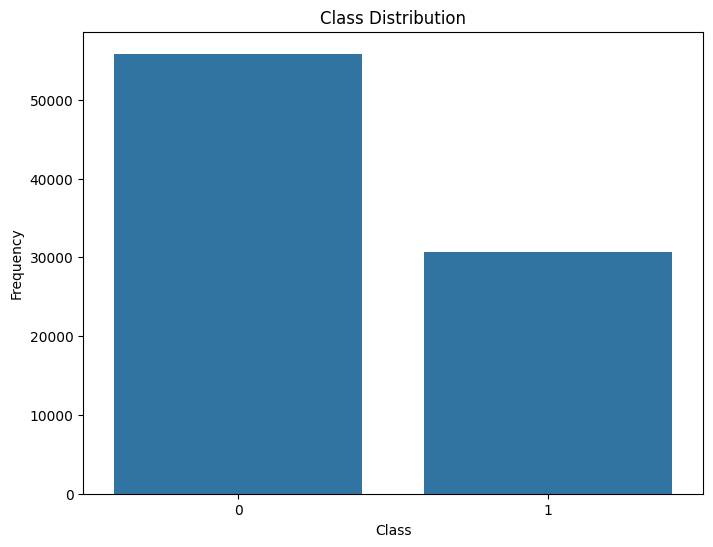

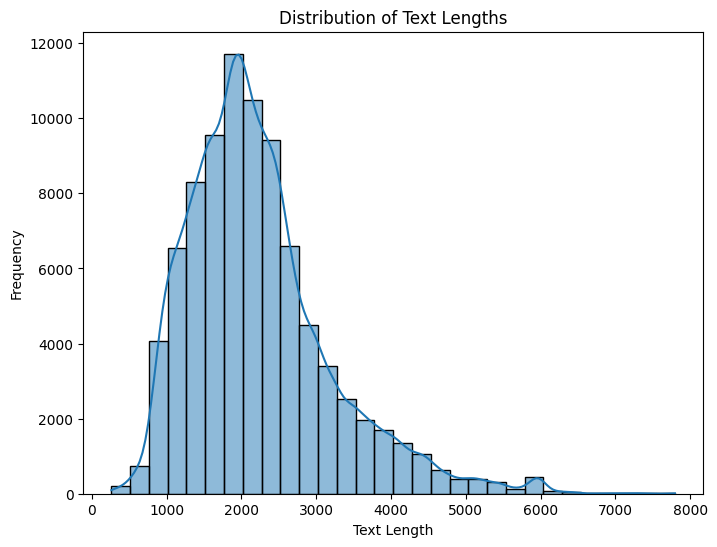

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from wordcloud import WordCloud

# Load the dataset (replace 'dataset.csv' with your file name)
df = pd.read_csv("final_test.csv")  # Adjust separator as needed

# Check the number of classes
num_classes = df['label'].nunique()
class_counts = df['label'].value_counts()

# Display basic information about classes
print(f"Number of classes: {num_classes}")
print("Class distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Analyze text lengths
df['text_length'] = df['text'].apply(len)
avg_text_length = df['text_length'].mean()

# Plot distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()